In [1]:
import torch
import os, sys
from torchvision import transforms
ultralytics_dir = os.path.abspath("../")
sys.path.append(ultralytics_dir)
from PIL import Image, ImageDraw
from ultralytics import YOLO
import matplotlib.pyplot as plt

/home/minhnq/miniconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Đường dẫn tới hình ảnh
image_path = 'MVI_40244_img00675.jpg'

# Định nghĩa các phép biến đổi
preprocess = transforms.Compose([
    transforms.Resize((640, 640)),  # Thay đổi kích thước ảnh
    transforms.ToTensor(),           # Chuyển ảnh thành tensor
    transforms.Lambda(lambda x: x/255.0) # Chia mỗi giá trị pixel cho 255 để đưa vào phạm vi từ 0 đến 1
])

# Đọc hình ảnh từ đường dẫn
image = Image.open(image_path)

# Áp dụng các phép biến đổi và chuyển hình ảnh thành tensor
image_tensor = preprocess(image)

# Thêm một chiều ở phía đầu của tensor để tạo thành batch (nếu cần)
image_tensor = image_tensor.unsqueeze(0)


# model = YOLO('/home/minhnq/ultralytics/pruning/train5/step_4_finetune/weights/best.onnx', task='detect')
model = YOLO('v8s_relu_VOC.pt', task='detect')
# model.export(format = 'onnx')

model.model.train()



DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (2): C2f_v2(
      (cv0): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): ReLU(inplace=True)
      )
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): ReLU(inplace=True)
      )
 

tensor(0.5474)


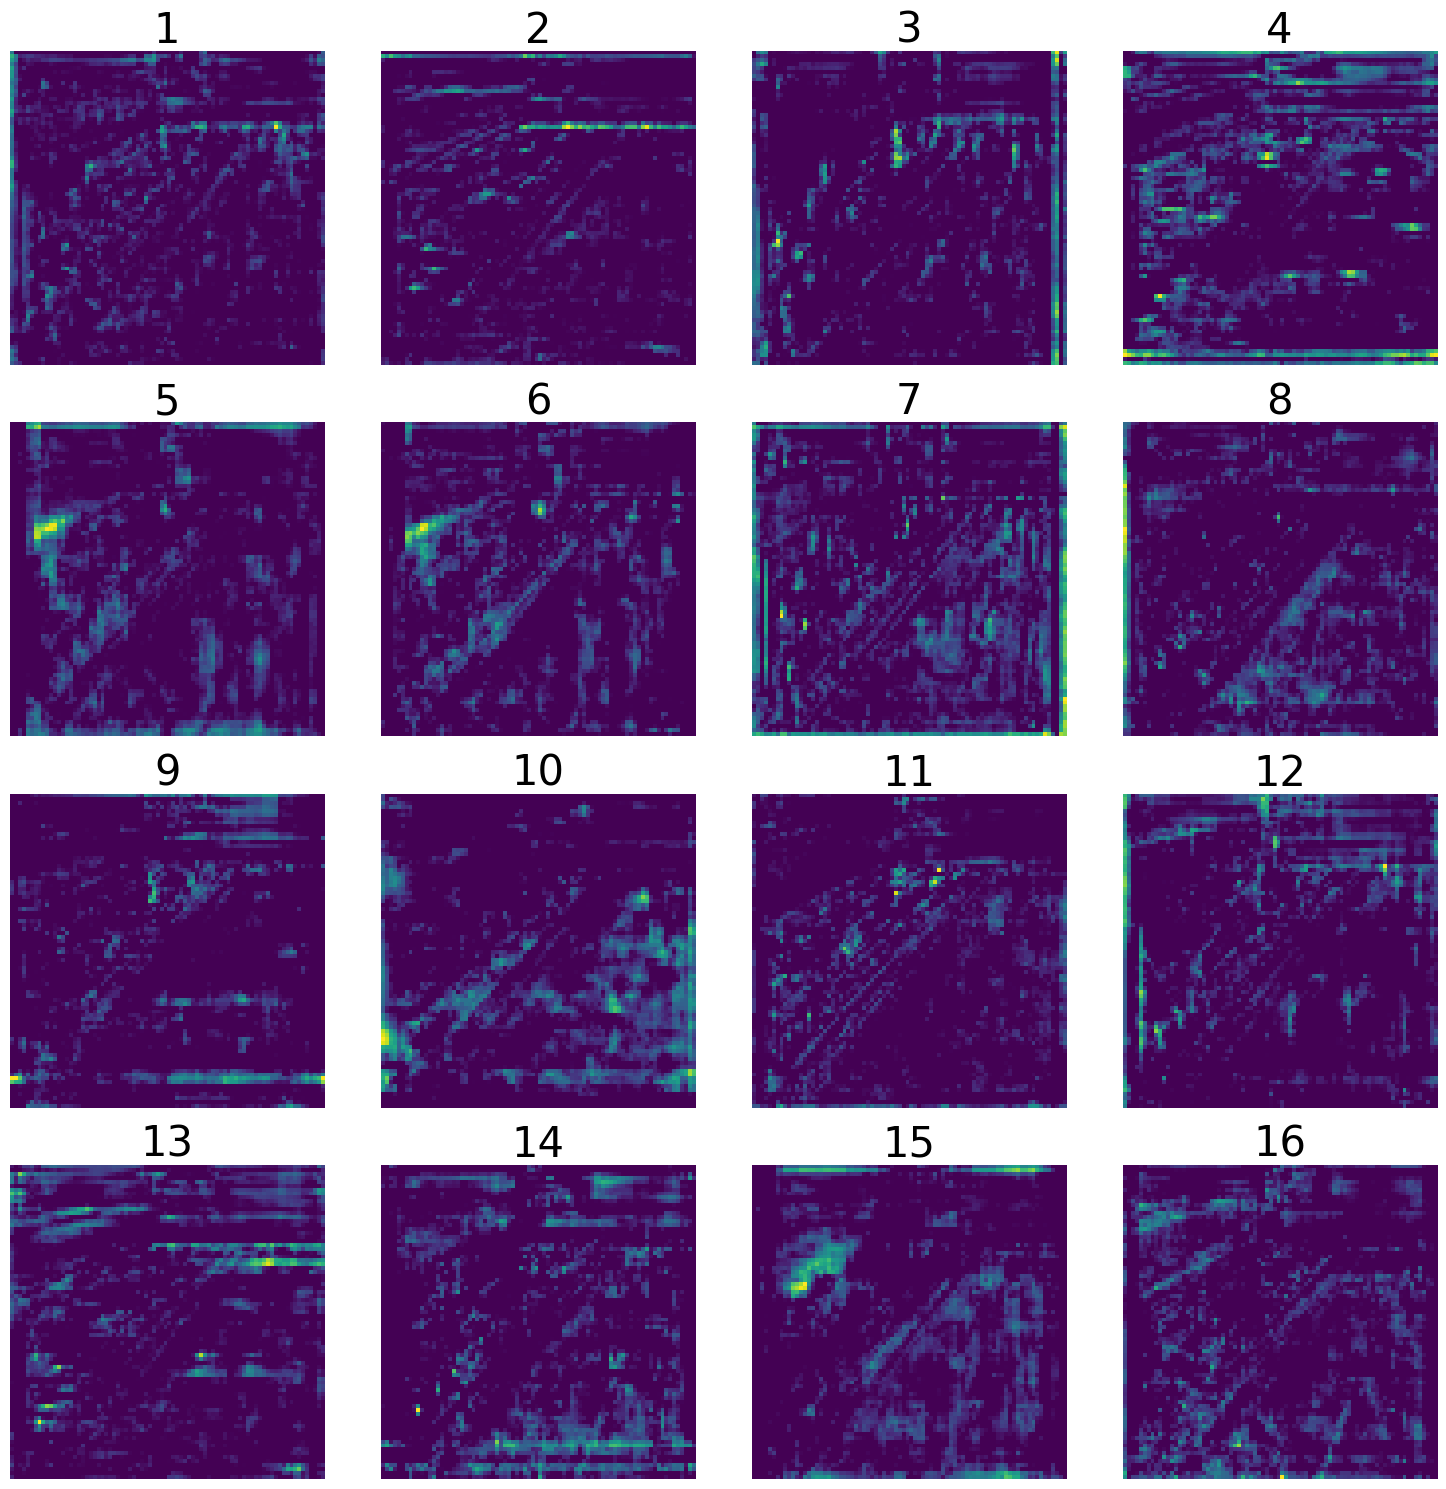

In [3]:
from pytorch_msssim import ssim, ms_ssim
_, features = model.model(image_tensor, mask_id = [15])  # forward
# Mở ảnh sử dụng thư viện Pillow

feat = features[0][0]

feat_min = feat.amin(dim=(1, 2), keepdim=True)
feat_max = feat.amax(dim=(1, 2), keepdim=True)
feat = (feat - feat_min) / (feat_max - feat_min + 1e-8) 
m = 4
fig, axes = plt.subplots(m, m, figsize=(15, 15))
for ax in axes.flatten():
    ax.axis('off')
for i in range(m):
    for j in range(m):
        # print(i*4+j)
        axes[i, j].imshow(feat[i*m+j].cpu().numpy(), cmap='viridis')
        axes[i, j].set_title(f'{i*m+j + 1}', fontsize=30, pad=5)  # Thêm số thứ tự

# max_val = 0
# for i in range(m):
#     for j in range(i+1, m):
#         tmp = ms_ssim(feat[i].unsqueeze(0).unsqueeze(0), feat[j].unsqueeze(0).unsqueeze(0), data_range=1.0)
#         max_val = max(max_val, tmp)
max_val = ms_ssim(feat[4].unsqueeze(0).unsqueeze(0), feat[5].unsqueeze(0).unsqueeze(0), data_range=1.0, win_size=5)
print(max_val)
plt.tight_layout()
plt.show()